## More machine learning modeling for analysis
* the first question will be a classical question to see whether I can predict Gill Attachment from the predictor variables
* the second question will deal with unsupervised learning and see whether I can learn hidden patterns from the
mushroom categories themselves
* Evaluation and reference to which datacamp course was used will be documented in the notebook after each trial run

In [2]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
import plotly.express as px
from kmodes.kmodes import KModes

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import joblib

from sklearn import set_config
sns.set_palette('Set2')
set_config(display='diagram')

from yellowbrick.cluster import KElbowVisualizer


## First Question <a class="anchor" id="q1"></a>
### Predict the Gill-attachment of mushroom from its predictor variables
### Classification methods will be used
### Dataset: Mushroom edibility, source: from https://archive.ics.uci.edu/ml/datasets/mushroom
* imported dataset will be already cleaned from course project
* Chose this question for practice with binary classification 

In [3]:
# import dataset
path = r'../../data/processed/mushroom_imputed_2_adj.csv'
mushroom = pd.read_csv(path)
mushroom.head()

,Class,Cap-Shape,Cap-Surface,Cap-Color,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Color,...,Stalk-Surface-Above-Ring,Stalk-Surface-Below-Ring,Stalk-Color-Above-Ring,Stalk-Color-Below-Ring,Veil-Color,Ring-Number,Ring-Type,Spore-Print-Color,Population,Habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


In [4]:
mushroom['Gill-Attachment']

0           free
1           free
2           free
3           free
4           free
          ...   
8107    attached
8108    attached
8109        free
8110    attached
8111        free
Name: Gill-Attachment, Length: 8112, dtype: object

In [5]:
X = mushroom.drop('Gill-Attachment', axis=1)
y = mushroom[['Gill-Attachment']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
X_train.shape

(6084, 21)

In [6]:
# Preprocessing the training data

ordinal_X = OrdinalEncoder()
X_train = ordinal_X.fit_transform(X_train)

ordinal_y = OrdinalEncoder()
y_train = ordinal_y.fit_transform((y_train))

display('X train', X_train, 'y train', y_train)


'X train'

array([[1., 4., 2., ..., 7., 4., 1.],
       [1., 4., 3., ..., 7., 4., 6.],
       [0., 2., 2., ..., 0., 4., 6.],
       ...,
       [0., 3., 2., ..., 1., 5., 3.],
       [0., 0., 3., ..., 7., 3., 0.],
       [0., 4., 0., ..., 7., 2., 0.]])

'y train'

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [7]:
# preprocess the test data

X_test = ordinal_X.transform(X_test)

y_test = ordinal_y.transform(y_test)

display('X test', X_test, 'y test', y_test)

'X test'

array([[0., 3., 0., ..., 1., 4., 6.],
       [0., 2., 0., ..., 1., 4., 6.],
       [0., 2., 3., ..., 1., 4., 1.],
       ...,
       [1., 3., 2., ..., 7., 1., 6.],
       [0., 0., 3., ..., 1., 1., 1.],
       [0., 2., 2., ..., 0., 5., 6.]])

'y test'

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [8]:
# make y_train and y_test one dimensional for random forest classifier

y_train = np.concatenate(y_train).ravel()
y_test = np.concatenate(y_test).ravel()
y_train, y_test

(array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 0., ..., 0., 0., 1.]))

In [9]:
# run data on Decision Tree Classifier

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), {}, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={})

In [10]:
print('train score', rf_grid.best_score_)
print('test score', rf_grid.score(X_test, y_test))
print('std dev', rf_grid.cv_results_['std_test_score'][rf_grid.best_index_])

train score 0.9965478095402845
test score 0.995069033530572
std dev 0.0017565796650619114


Due to having a large number of features that have strong associations with this feature; this comes as no surprise
that we get this result

## Try with simpler model, logistics regression
* need to preprocess differently with one hot encode rather than label encode as this is not legitimate otherwise for
interpretability

In [11]:
# Add column name to each value to make it more interpretable when reading slope results of Log Regression
for col in X.columns:
    X[col] = X[col].apply(lambda x: col + ': ' + x)
X

,Class,Cap-Shape,Cap-Surface,Cap-Color,Bruises,Odor,Gill-Spacing,Gill-Size,Gill-Color,Stalk-Shape,...,Stalk-Surface-Above-Ring,Stalk-Surface-Below-Ring,Stalk-Color-Above-Ring,Stalk-Color-Below-Ring,Veil-Color,Ring-Number,Ring-Type,Spore-Print-Color,Population,Habitat
0,Class: poisonous,Cap-Shape: convex,Cap-Surface: smooth,Cap-Color: brown,Bruises: bruises,Odor: pungent,Gill-Spacing: close,Gill-Size: narrow,Gill-Color: black,Stalk-Shape: enlarging,...,Stalk-Surface-Above-Ring: smooth,Stalk-Surface-Below-Ring: smooth,Stalk-Color-Above-Ring: white,Stalk-Color-Below-Ring: white,Veil-Color: white,Ring-Number: one,Ring-Type: pendant,Spore-Print-Color: black,Population: scattered,Habitat: urban
1,Class: edible,Cap-Shape: convex,Cap-Surface: smooth,Cap-Color: yellow,Bruises: bruises,Odor: almond,Gill-Spacing: close,Gill-Size: broad,Gill-Color: black,Stalk-Shape: enlarging,...,Stalk-Surface-Above-Ring: smooth,Stalk-Surface-Below-Ring: smooth,Stalk-Color-Above-Ring: white,Stalk-Color-Below-Ring: white,Veil-Color: white,Ring-Number: one,Ring-Type: pendant,Spore-Print-Color: brown,Population: numerous,Habitat: grasses
2,Class: edible,Cap-Shape: bell,Cap-Surface: smooth,Cap-Color: white,Bruises: bruises,Odor: anise,Gill-Spacing: close,Gill-Size: broad,Gill-Color: brown,Stalk-Shape: enlarging,...,Stalk-Surface-Above-Ring: smooth,Stalk-Surface-Below-Ring: smooth,Stalk-Color-Above-Ring: white,Stalk-Color-Below-Ring: white,Veil-Color: white,Ring-Number: one,Ring-Type: pendant,Spore-Print-Color: brown,Population: numerous,Habitat: meadows
3,Class: poisonous,Cap-Shape: convex,Cap-Surface: scaly,Cap-Color: white,Bruises: bruises,Odor: pungent,Gill-Spacing: close,Gill-Size: narrow,Gill-Color: brown,Stalk-Shape: enlarging,...,Stalk-Surface-Above-Ring: smooth,Stalk-Surface-Below-Ring: smooth,Stalk-Color-Above-Ring: white,Stalk-Color-Below-Ring: white,Veil-Color: white,Ring-Number: one,Ring-Type: pendant,Spore-Print-Color: black,Population: scattered,Habitat: urban
4,Class: edible,Cap-Shape: convex,Cap-Surface: smooth,Cap-Color: gray,Bruises: no,Odor: none,Gill-Spacing: crowded,Gill-Size: broad,Gill-Color: black,Stalk-Shape: tapering,...,Stalk-Surface-Above-Ring: smooth,Stalk-Surface-Below-Ring: smooth,Stalk-Color-Above-Ring: white,Stalk-Color-Below-Ring: white,Veil-Color: white,Ring-Number: one,Ring-Type: evanescent,Spore-Print-Color: brown,Population: abundant,Habitat: grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8107,Class: edible,Cap-Shape: convex,Cap-Surface: smooth,Cap-Color: brown,Bruises: no,Odor: none,Gill-Spacing: close,Gill-Size: broad,Gill-Color: yellow,Stalk-Shape: enlarging,...,Stalk-Surface-Above-Ring: smooth,Stalk-Surface-Below-Ring: smooth,Stalk-Color-Above-Ring: orange,Stalk-Color-Below-Ring: orange,Veil-Color: brown,Ring-Number: one,Ring-Type: pendant,Spore-Print-Color: buff,Population: several,Habitat: leaves
8108,Class: edible,Cap-Shape: flat,Cap-Surface: smooth,Cap-Color: brown,Bruises: no,Odor: none,Gill-Spacing: close,Gill-Size: broad,Gill-Color: brown,Stalk-Shape: enlarging,...,Stalk-Surface-Above-Ring: smooth,Stalk-Surface-Below-Ring: smooth,Stalk-Color-Above-Ring: orange,Stalk-Color-Below-Ring: orange,Veil-Color: orange,Ring-Number: one,Ring-Type: pendant,Spore-Print-Color: buff,Population: clustered,Habitat: leaves
8109,Class: poisonous,Cap-Shape: knobbed,Cap-Surface: scaly,Cap-Color: brown,Bruises: no,Odor: fishy,Gill-Spacing: close,Gill-Size: narrow,Gill-Color: buff,Stalk-Shape: tapering,...,Stalk-Surface-Above-Ring: smooth,Stalk-Surface-Below-Ring: silky,Stalk-Color-Above-Ring: white,Stalk-Color-Below-Ring: white,Veil-Color: white,Ring-Number: one,Ring-Type: evanescent,Spore-Print-Color: white,Population: several,Habitat: leaves
8110,Class: edible,Cap-Shape: convex,Cap-Surface: smooth,Cap-Color: brown,Bruises: no,Odor: none,Gill-Spacing: close,Gill-Size: broad,Gill-Color: yellow,Stalk-Shape: enlarging,...,Stalk-Surface-Above-Ring: smooth,Stalk-Surface-Below-Ring: smoot

In [12]:
# We can keep label encoding for our binary output; but one hot encoding needs to be done inputs for Log regression
X_train_2, X_test_2, null, null2 = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_cols = X_train_2.columns

one_hot_X = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_2 = one_hot_X.fit_transform(X_train_2)
X_test_2 = one_hot_X.transform(X_test_2)
# X_train_2 = one_hot_X.fit_transform(X_train_2)
# X_test_2 = one_hot_X.transform(X_test_2)


In [14]:
X_train_2.shape, y_train.shape

((6084, 115), (6084,))

In [15]:
lg_grid = GridSearchCV(LogisticRegression(max_iter=300), {}, cv=5)
lg_grid.fit(X_train_2, y_train)
lg_grid.best_score_

0.997040960299269

In [16]:
print('train score', lg_grid.best_score_)
print('test score', lg_grid.score(X_test_2, y_test))
print('std dev', lg_grid.cv_results_['std_test_score'][rf_grid.best_index_])


train score 0.997040960299269
test score 0.9955621301775148
std dev 0.0016935312031370572


Logistic regression does really well for this example which is not surprising, with the number of very high associations
with this features from looking back at cramers v table

In [17]:
# get other metrics
lg = lg_grid.best_estimator_
y_pred_lg = lg.predict(X_test_2)

In [18]:
def get_classification_metrics(y_test, y_pred):
    """
    Returns classification metrics as a list of precisin, recall, f1, specificity, accuracy
    :param y_test:
    :param y_pred:
    :return:
    """

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = tp / (tp + fp)

    # also called sensitivity
    recall = tp / (tp + fn)

    f1 = 2 * (precision * recall) / (precision + recall)

    accuracy = (tp + tn) / (tp + fp + tn + fn)

    # also called true negative
    specificity = tn / (tn + fp)

    return [precision, recall, f1, specificity, accuracy]

In [19]:
print('Precision:', round(get_classification_metrics(y_test, y_pred_lg)[0], 4))

print('Recall:', round(get_classification_metrics(y_test, y_pred_lg)[1], 4))

print('F1-Score:', round(get_classification_metrics(y_test, y_pred_lg)[2], 4))

print('Specificity:', round(get_classification_metrics(y_test, y_pred_lg)[3], 4))

print('Accuracy:', round(get_classification_metrics(y_test, y_pred_lg)[4], 4))

Precision: 0.997
Recall: 0.9985
F1-Score: 0.9977
Specificity: 0.8723
Accuracy: 0.9956


In [20]:
coefs = np.concatenate(lg.coef_).ravel()
feats = np.concatenate(one_hot_X.categories_).ravel()

coef_df = pd.DataFrame({'slope':coefs, 'features':feats}).sort_values(by='slope', ascending=False)
coef_df

,slope,features
83,1.218470,Veil-Color: white
51,0.984511,Stalk-Root: bulbous
70,0.952934,Stalk-Color-Above-Ring: white
79,0.937796,Stalk-Color-Below-Ring: white
22,0.777955,Bruises: bruises
...,...,...
103,-0.758304,Population: clustered
23,-0.777974,Bruises: no
109,-1.077380,Habitat: leaves
67,-1.327787,Stalk-Color-Above-Ring: orange


In [21]:
# get top 10 positive and top 10 negative slopes
# top 10 positive slopes
coef_df_top_pos = coef_df.iloc[:10]
display(coef_df_top_pos)

coef_df_top_neg = coef_df.iloc[-10:]
display(coef_df_top_neg)

,slope,features
83,1.218470,Veil-Color: white
51,0.984511,Stalk-Root: bulbous
70,0.952934,Stalk-Color-Above-Ring: white
79,0.937796,Stalk-Color-Below-Ring: white
22,0.777955,Bruises: bruises
50,0.595683,Stalk-Shape: tapering
88,0.591502,Ring-Type: evanescent
36,0.541642,Gill-Size: narrow
108,0.464082,Habitat: grasses
8,0.426399,Cap-Surface: fibrous


,slope,features
11,-0.622264,Cap-Surface: smooth
81,-0.630790,Veil-Color: brown
14,-0.655126,Cap-Color: cinnamon
82,-0.696997,Veil-Color: orange
53,-0.712507,Stalk-Root: equal
103,-0.758304,Population: clustered
23,-0.777974,Bruises: no
109,-1.077380,Habitat: leaves
67,-1.327787,Stalk-Color-Above-Ring: orange
76,-1.327787,Stalk-Color-Below-Ring: orange


In [22]:
# format df in a manner I can generate a slope graph from R
# add positions to get slopes
# add grouping for these positiosn (to make two groupings we need to duplice and append dataframes
# then change first half to be 0 and second half remain same values (as these values are slopes)
# then reset indexing
coef_df_top_pos = coef_df_top_pos.append(coef_df_top_pos)
coef_df_top_pos.reset_index(inplace=True)
coef_df_top_pos.drop('index', axis=1, inplace=True)
coef_df_top_pos['slope'].iloc[:10] = 0
coef_df_top_pos['slope'] = coef_df_top_pos['slope'].apply(lambda x: round(x,2))
display(coef_df_top_pos)

# repeat for top negative slopes
coef_df_top_neg = coef_df_top_neg.append(coef_df_top_neg)
coef_df_top_neg.reset_index(inplace=True)
coef_df_top_neg.drop('index', axis=1, inplace=True)
coef_df_top_neg['slope'].iloc[:10] = 0
coef_df_top_neg['slope'] = coef_df_top_neg['slope'].apply(lambda x: round(x,2))
display(coef_df_top_neg)

/home/wkc/Documents/Springboard/Projects_and_Assignments/Mushroom-Classification/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/wkc/Documents/Springboard/Projects_and_Assignments/Mushroom-Classification/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,slope,features
0,0.00,Veil-Color: white
1,0.00,Stalk-Root: bulbous
2,0.00,Stalk-Color-Above-Ring: white
3,0.00,Stalk-Color-Below-Ring: white
4,0.00,Bruises: bruises
5,0.00,Stalk-Shape: tapering
6,0.00,Ring-Type: evanescent
7,0.00,Gill-Size: narrow
8,0.00,Habitat: grasses
9,0.00,Cap-Surface: fibrous


,slope,features
0,0.00,Cap-Surface: smooth
1,0.00,Veil-Color: brown
2,0.00,Cap-Color: cinnamon
3,0.00,Veil-Color: orange
4,0.00,Stalk-Root: equal
5,0.00,Population: clustered
6,0.00,Bruises: no
7,0.00,Habitat: leaves
8,0.00,Stalk-Color-Above-Ring: orange
9,0.00,Stalk-Color-Below-Ring: orange


In [23]:
# make positions where whe want to splot the slopes

positions = [int(vals) for vals in np.linspace(0,1.99,num=20)]

coef_df_top_pos.insert(0, 'position', positions)
coef_df_top_neg.insert(0, 'position', positions)
display(coef_df_top_pos)
display(coef_df_top_neg)

,position,slope,features
0,0,0.00,Veil-Color: white
1,0,0.00,Stalk-Root: bulbous
2,0,0.00,Stalk-Color-Above-Ring: white
3,0,0.00,Stalk-Color-Below-Ring: white
4,0,0.00,Bruises: bruises
5,0,0.00,Stalk-Shape: tapering
6,0,0.00,Ring-Type: evanescent
7,0,0.00,Gill-Size: narrow
8,0,0.00,Habitat: grasses
9,0,0.00,Cap-Surface: fibrous


,position,slope,features
0,0,0.00,Cap-Surface: smooth
1,0,0.00,Veil-Color: brown
2,0,0.00,Cap-Color: cinnamon
3,0,0.00,Veil-Color: orange
4,0,0.00,Stalk-Root: equal
5,0,0.00,Population: clustered
6,0,0.00,Bruises: no
7,0,0.00,Habitat: leaves
8,0,0.00,Stalk-Color-Above-Ring: orange
9,0,0.00,Stalk-Color-Below-Ring: orange


In [24]:
#save the slopes of the features to code in R example practice
pos_path = r'../../data/processed/gill-attached-top-pos-slopes.csv'
neg_path = r'../../data/processed/gill-attached-top-neg-slopes.csv'
coef_df_top_pos.to_csv(pos_path)
coef_df_top_neg.to_csv(neg_path)

## Second Question <a class="anchor" id="q2"></a>
### Use clustering to learn hidden patterns from the mushroom dataset
### Using same dataset as First Question

In [25]:
mushroom
X = mushroom.copy()
X

,Class,Cap-Shape,Cap-Surface,Cap-Color,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Color,...,Stalk-Surface-Above-Ring,Stalk-Surface-Below-Ring,Stalk-Color-Above-Ring,Stalk-Color-Below-Ring,Veil-Color,Ring-Number,Ring-Type,Spore-Print-Color,Population,Habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8107,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,smooth,orange,orange,brown,one,pendant,buff,several,leaves
8108,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8109,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,smooth,silky,white,white,white,one,evanescent,white,several,leaves
8110,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,smooth,orange,orange,orange,one,pendant,orange,clustered,leaves


In [26]:
ordinal_enc = OrdinalEncoder()
X = ordinal_enc.fit_transform(X)
X

array([[1., 2., 3., ..., 0., 3., 4.],
       [0., 2., 3., ..., 1., 2., 0.],
       [0., 0., 3., ..., 1., 2., 2.],
       ...,
       [1., 4., 2., ..., 7., 4., 1.],
       [0., 2., 3., ..., 5., 1., 1.],
       [0., 4., 3., ..., 7., 3., 0.]])

In [27]:
km = KModes(random_state=42)

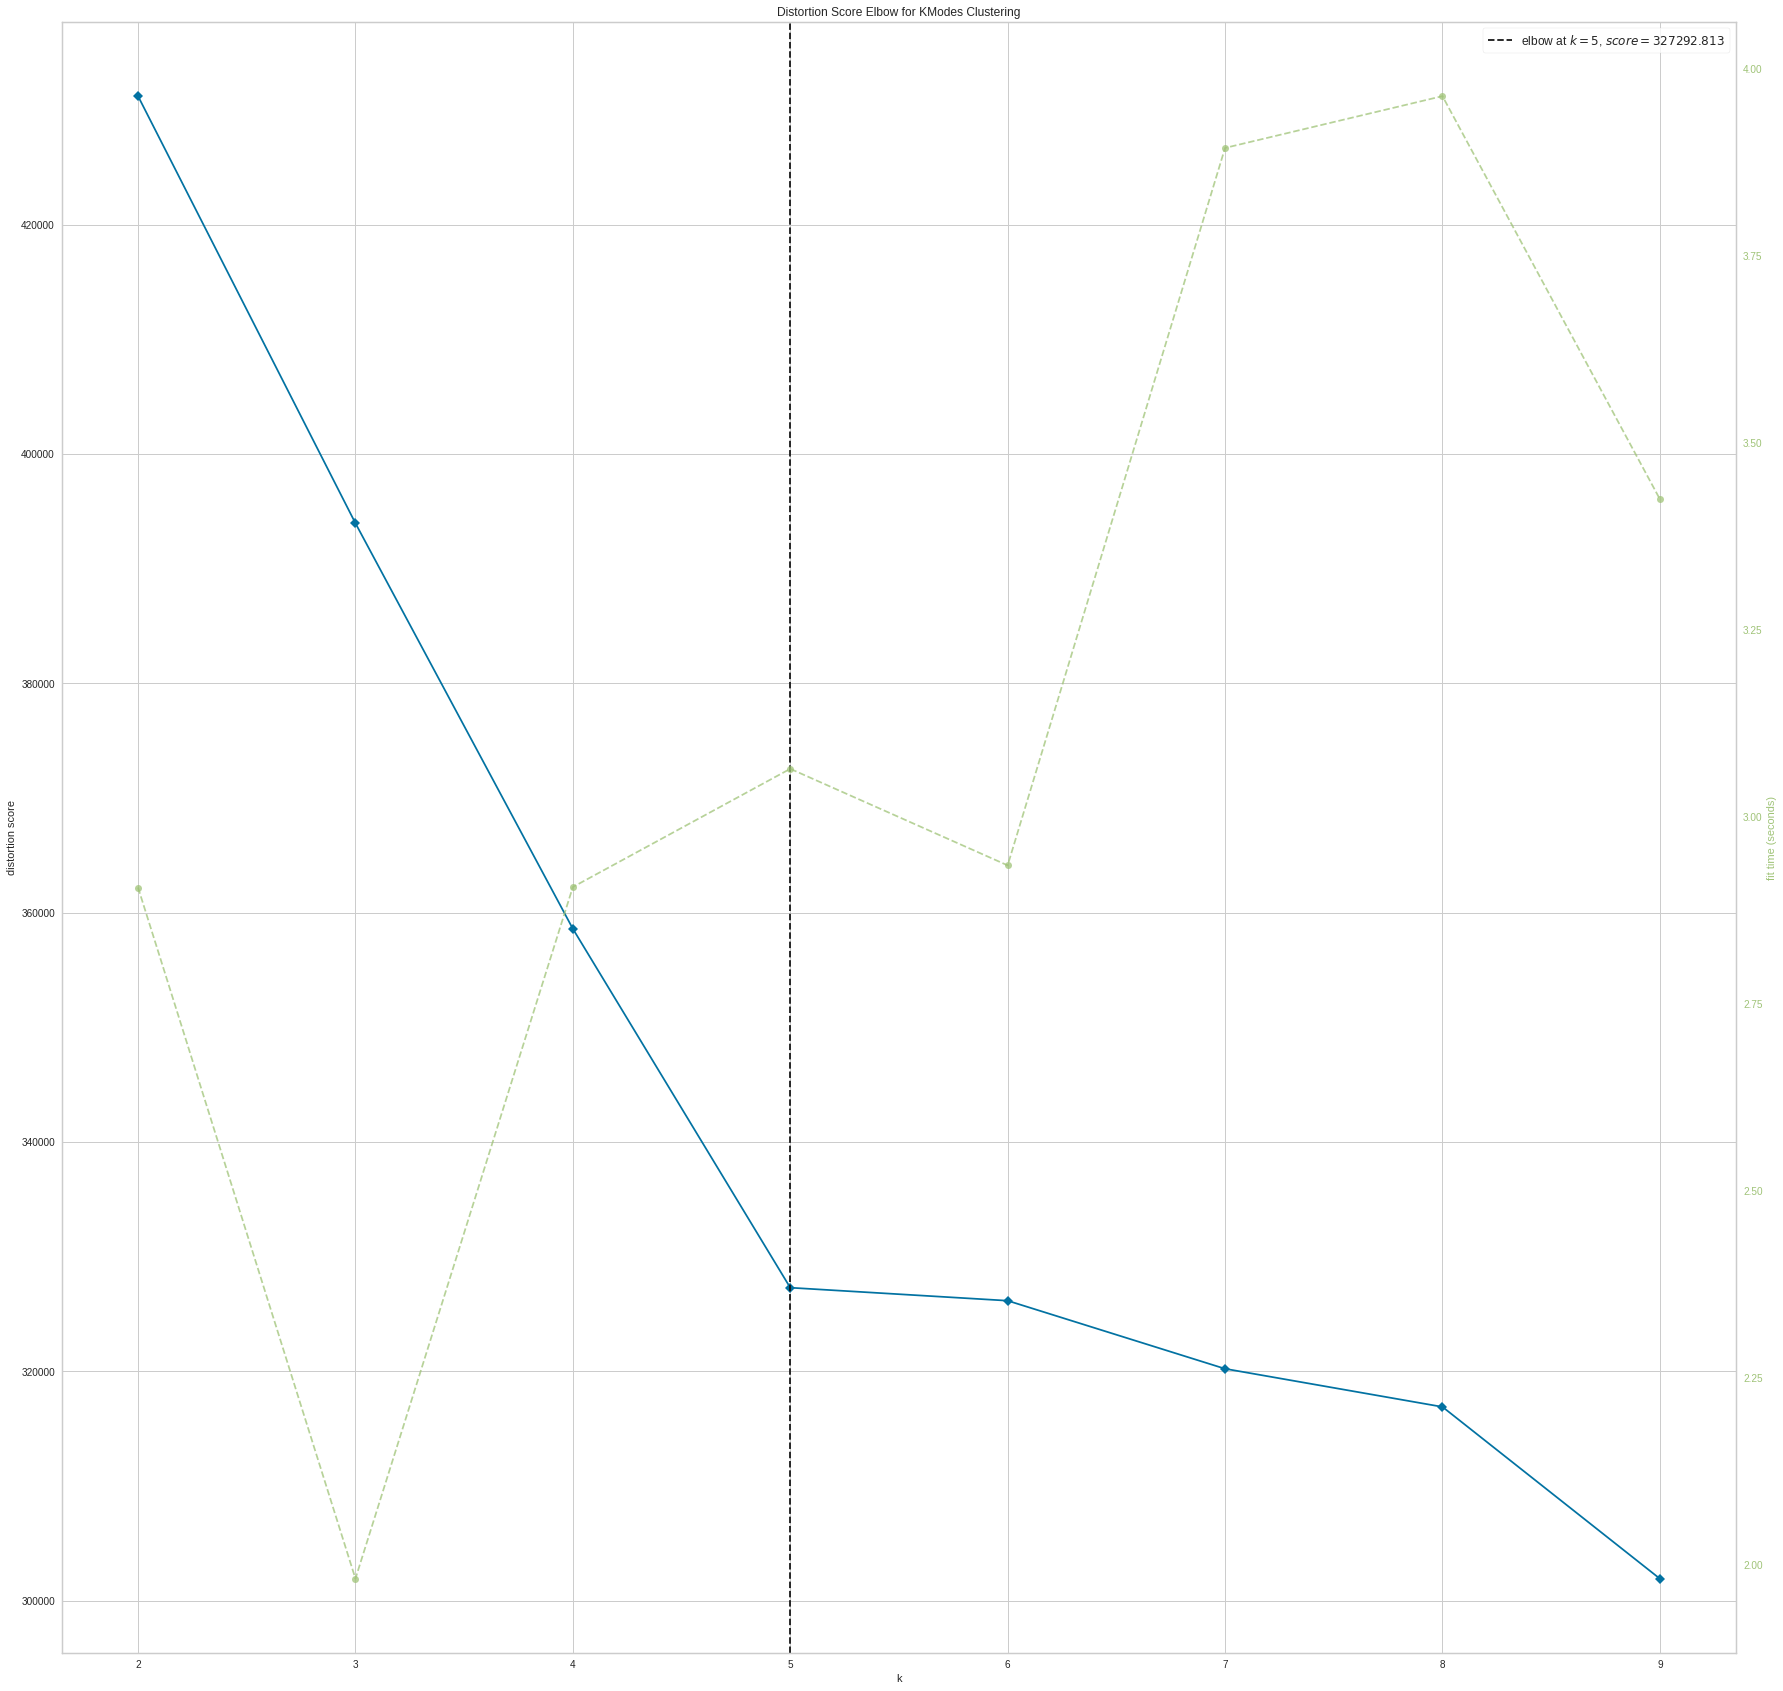

<AxesSubplot:title={'center':'Distortion Score Elbow for KModes Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
plt.figure(figsize=(30,30))

# run KMode from k values 2 to 10
elbow_visualizer = KElbowVisualizer(km, k=(2,10))
elbow_visualizer.fit(X)
elbow_visualizer.show()

The elbow method from this graph says there should be 5 clusters


In [29]:
mushroom.columns

Index(['Class', 'Cap-Shape', 'Cap-Surface', 'Cap-Color', 'Bruises', 'Odor',
       'Gill-Attachment', 'Gill-Spacing', 'Gill-Size', 'Gill-Color',
       'Stalk-Shape', 'Stalk-Root', 'Stalk-Surface-Above-Ring',
       'Stalk-Surface-Below-Ring', 'Stalk-Color-Above-Ring',
       'Stalk-Color-Below-Ring', 'Veil-Color', 'Ring-Number', 'Ring-Type',
       'Spore-Print-Color', 'Population', 'Habitat'],
      dtype='object')

In [30]:
km5 = KModes(n_clusters=5, random_state=42)
km5.fit(X)

kmode_clusters = km5.labels_
kmode_centroids = km5.cluster_centroids_

In [31]:
mushroom_d = pd.DataFrame(X, columns=mushroom.columns)
mushroom_d.insert(0, 'Cluster_Id', kmode_clusters)
mushroom_d

,Cluster_Id,Class,Cap-Shape,Cap-Surface,Cap-Color,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,...,Stalk-Surface-Above-Ring,Stalk-Surface-Below-Ring,Stalk-Color-Above-Ring,Stalk-Color-Below-Ring,Veil-Color,Ring-Number,Ring-Type,Spore-Print-Color,Population,Habitat
0,0,1.0,2.0,3.0,0.0,0.0,7.0,1.0,0.0,1.0,...,3.0,3.0,7.0,7.0,2.0,1.0,4.0,0.0,3.0,4.0
1,0,0.0,2.0,3.0,9.0,0.0,0.0,1.0,0.0,0.0,...,3.0,3.0,7.0,7.0,2.0,1.0,4.0,1.0,2.0,0.0
2,0,0.0,0.0,3.0,8.0,0.0,1.0,1.0,0.0,0.0,...,3.0,3.0,7.0,7.0,2.0,1.0,4.0,1.0,2.0,2.0
3,0,1.0,2.0,2.0,8.0,0.0,7.0,1.0,0.0,1.0,...,3.0,3.0,7.0,7.0,2.0,1.0,4.0,0.0,3.0,4.0
4,4,0.0,2.0,3.0,3.0,1.0,6.0,1.0,1.0,0.0,...,3.0,3.0,7.0,7.0,2.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8107,0,0.0,2.0,3.0,0.0,1.0,6.0,0.0,0.0,0.0,...,3.0,3.0,4.0,4.0,0.0,1.0,4.0,2.0,4.0,1.0
8108,4,0.0,3.0,3.0,0.0,1.0,6.0,0.0,0.0,0.0,...,3.0,3.0,4.0,4.0,1.0,1.0,4.0,2.0,1.0,1.0
8109,2,1.0,4.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,...,3.0,2.0,7.0,7.0,2.0,1.0,0.0,7.0,4.0,1.0
8110,0,0.0,2.0,3.0,0.0,1.0,6.0,0.0,0.0,0.0,...,3.0,3.0,4.0,4.0,1.0,1.0,4.0,5.0,1.0,1.0


In [32]:
# we group by mode because our categoires are not ordinal by nature
mushroom_clusters = mushroom_d[mushroom_d.columns.tolist()].groupby('Cluster_Id').agg(lambda x:x.value_counts().index[0])
mushroom_clusters

,Class,Cap-Shape,Cap-Surface,Cap-Color,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Color,...,Stalk-Surface-Above-Ring,Stalk-Surface-Below-Ring,Stalk-Color-Above-Ring,Stalk-Color-Below-Ring,Veil-Color,Ring-Number,Ring-Type,Spore-Print-Color,Population,Habitat
Cluster_Id,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.0,2.0,0.0,0.0,6.0,1.0,0.0,0.0,10.0,...,3.0,3.0,7.0,7.0,2.0,1.0,4.0,1.0,4.0,6.0
1,1.0,2.0,2.0,9.0,1.0,4.0,1.0,0.0,0.0,3.0,...,2.0,2.0,0.0,0.0,2.0,1.0,2.0,3.0,4.0,6.0
2,1.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,2.0,...,2.0,3.0,7.0,7.0,2.0,1.0,0.0,7.0,4.0,6.0
3,0.0,2.0,3.0,8.0,1.0,6.0,1.0,1.0,0.0,10.0,...,3.0,3.0,7.0,7.0,2.0,2.0,4.0,7.0,3.0,0.0
4,0.0,3.0,3.0,8.0,1.0,6.0,1.0,1.0,0.0,1.0,...,3.0,3.0,7.0,7.0,2.0,1.0,0.0,0.0,3.0,0.0


In [33]:
mushroom_clusters.shape

(5, 22)

In [34]:
# Make a dataframe with labels instead of encoded values for interpretability
mushroom_clusters = pd.DataFrame(ordinal_enc.inverse_transform(mushroom_clusters), columns=mushroom_clusters.columns)
mushroom_clusters

,Class,Cap-Shape,Cap-Surface,Cap-Color,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Color,...,Stalk-Surface-Above-Ring,Stalk-Surface-Below-Ring,Stalk-Color-Above-Ring,Stalk-Color-Below-Ring,Veil-Color,Ring-Number,Ring-Type,Spore-Print-Color,Population,Habitat
0,edible,convex,scaly,brown,bruises,none,free,close,broad,white,...,smooth,smooth,white,white,white,one,pendant,brown,several,woods
1,poisonous,convex,scaly,yellow,no,foul,free,close,broad,chocolate,...,silky,silky,brown,brown,white,one,large,chocolate,several,woods
2,poisonous,flat,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,smooth,white,white,white,one,evanescent,white,several,woods
3,edible,convex,smooth,white,no,none,free,crowded,broad,white,...,smooth,smooth,white,white,white,two,pendant,white,scattered,grasses
4,edible,flat,smooth,white,no,none,free,crowded,broad,brown,...,smooth,smooth,white,white,white,one,evanescent,black,scattered,grasses


In [35]:
mushroom_clusters.T

,0,1,2,3,4
Class,edible,poisonous,poisonous,edible,edible
Cap-Shape,convex,convex,flat,convex,flat
Cap-Surface,scaly,scaly,scaly,smooth,smooth
Cap-Color,brown,yellow,brown,white,white
Bruises,bruises,no,no,no,no
Odor,none,foul,fishy,none,none
Gill-Attachment,free,free,free,free,free
Gill-Spacing,close,close,close,crowded,crowded
Gill-Size,broad,broad,narrow,broad,broad
Gill-Color,white,chocolate,buff,white,brown


### Evaluation <a class="anchor" id="e2"></a>
Because our categories are not ordinal of nature we cannot necessarily use a mean for our average because it would make
least sense in terms of interpretation. Instead mode for our average was used as frequency features makes most sense for
our problem and would lead to more interpretability.

From our results, it appears that 5 clusters can be generated from the mushroom dataset.
From the 5 clusters, some prominent features noted
* Cluster 0: edible, no odor, white gill-color, and stalk-surface-above-ring is smooth
* Cluster 1: poisonous, foul odor, gray gill-color, and stalk-surface-above-ring is silky
* Cluster 2: poisonous, spicy odor, buff gill color, and stalk-surface-above-ring is silky
* Cluster 3: Edible, no odor, white gill color, and stalk-surface-above-ring is smooth
* Cluster 4: Edible, no odor, brown gill color, and stalk-surface-above-ring is smooth

This pattern in analysis leads to belief that edible mushrooms will often have no smell, and have a stalk-surface-above-ring
this is smooth.
Other notable patterns from looking at the clusters are that mushrooms in wood habitats have serveral population, wheras
grass habitat mushrooms have scattered populations, and crowded gill-spacing rather than close.

The methods for answering this question were taken from the Cluster Analysis datacamp course, particularly the
elbow method used to determine the optimum number of clusters to choose from. Also the explanation of clustering
and using visuals for interpretation from the Cluster Analysis in Python course were used as well. Unfortunately
because datacamp only explains and uses kmeans in the course, learning to kmode was taken from a separate online
source, the Pypi.org libraries.